In [282]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# for data scaling and splitting
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
# for neural net
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# for evaluation
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [283]:
data = pd.read_csv("data/combined_expression.csv")
data['classification'].map({1: 0, 2: 1})
data.head()
data.shape

(642, 16383)

In [284]:
selected_genes = pd.read_csv('cleaned/boruta-99-25-0.01.csv')
selected_genes = selected_genes.values.tolist()
selected_genes = list(itertools.chain(*selected_genes))

In [490]:
# retrieving proper columns
X = data.loc[:, selected_genes]
y = data['classification'].values

# scaling the data
scalar = MinMaxScaler()
x_scaled = scalar.fit_transform(X)

# splitting data (20% test, 80% train)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

# 4 Hidden Layers (with batch normalization)

In [515]:
from tensorflow.keras.layers import BatchNormalization

def create_model(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(Dense(hidden_layers, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense((hidden_layers*1.45), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense((hidden_layers), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense((hidden_layers*0.5), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [516]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, optimizer='Adam',init='normal')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test))
y_pred = model.predict(X_test)

Train on 513 samples, validate on 129 samples
Epoch 1/50
513/513 [==============================] - 3s 6ms/sample - loss: 0.8948 - accuracy: 0.5517 - val_loss: 0.7883 - val_accuracy: 0.0078
Epoch 2/50
513/513 [==============================] - 0s 695us/sample - loss: 0.7368 - accuracy: 0.6452 - val_loss: 1.2587 - val_accuracy: 0.0000e+00
Epoch 3/50
513/513 [==============================] - 0s 704us/sample - loss: 0.6504 - accuracy: 0.6745 - val_loss: 1.5341 - val_accuracy: 0.0000e+00
Epoch 4/50
513/513 [==============================] - 0s 719us/sample - loss: 0.5423 - accuracy: 0.7661 - val_loss: 1.7003 - val_accuracy: 0.0000e+00
Epoch 5/50
513/513 [==============================] - 0s 730us/sample - loss: 0.5093 - accuracy: 0.7329 - val_loss: 2.0215 - val_accuracy: 0.0000e+00
Epoch 6/50
513/513 [==============================] - 0s 717us/sample - loss: 0.5019 - accuracy: 0.7680 - val_loss: 1.8673 - val_accuracy: 0.0000e+00
Epoch 7/50
513/513 [==============================] - 0s 723

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'loss'], loc='upper right')
plt.ylim(0, 1)
plt.show()

# 3 Hidden Layers

In [391]:
def create_model2(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(BatchNormalization())
    model.add(Dense(hidden_layers*1.5, activation='relu'))
    model.add(Dropout(dropout))
    
    model.add(BatchNormalization())
    model.add(Dense((hidden_layers), activation='relu'))
    model.add(Dropout(dropout))

    model.add(BatchNormalization())
    model.add(Dense((hidden_layers*0.5), activation='relu'))
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [392]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model2, epochs=50, batch_size=32, optimizer='Adam', init='normal')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Train on 342 samples
Epoch 1/50
342/342 [==============================] - 2s 6ms/sample - loss: 0.7389 - accuracy: 0.5994
Epoch 2/50
342/342 [==============================] - 0s 464us/sample - loss: 0.5929 - accuracy: 0.7018
Epoch 3/50
342/342 [==============================] - 0s 480us/sample - loss: 0.4636 - accuracy: 0.7632
Epoch 4/50
342/342 [==============================] - 0s 467us/sample - loss: 0.4055 - accuracy: 0.8012
Epoch 5/50
342/342 [==============================] - 0s 468us/sample - loss: 0.3572 - accuracy: 0.8392
Epoch 6/50
342/342 [==============================] - 0s 501us/sample - loss: 0.3484 - accuracy: 0.8596
Epoch 7/50
342/342 [==============================] - 0s 475us/sample - loss: 0.2708 - accuracy: 0.9035
Epoch 8/50
342/342 [==============================] - 0s 485us/sample - loss: 0.2027 - accuracy: 0.9240
Epoch 9/50
342/342 [==============================] - 0s 485us/sample - loss: 0.2312 - accuracy: 0.9035
Epoch 10/50
342/342 [========================

Train on 342 samples
Epoch 1/50
342/342 [==============================] - 2s 6ms/sample - loss: 0.7837 - accuracy: 0.5556
Epoch 2/50
342/342 [==============================] - 0s 469us/sample - loss: 0.5597 - accuracy: 0.7222
Epoch 3/50
342/342 [==============================] - 0s 480us/sample - loss: 0.4896 - accuracy: 0.7602
Epoch 4/50
342/342 [==============================] - 0s 487us/sample - loss: 0.3924 - accuracy: 0.8070
Epoch 5/50
342/342 [==============================] - 0s 487us/sample - loss: 0.3704 - accuracy: 0.8421
Epoch 6/50
342/342 [==============================] - 0s 497us/sample - loss: 0.3633 - accuracy: 0.8099
Epoch 7/50
342/342 [==============================] - 0s 463us/sample - loss: 0.2470 - accuracy: 0.9035
Epoch 8/50
342/342 [==============================] - 0s 459us/sample - loss: 0.2729 - accuracy: 0.9006
Epoch 9/50
342/342 [==============================] - 0s 493us/sample - loss: 0.1914 - accuracy: 0.9152
Epoch 10/50
342/342 [========================

Train on 342 samples
Epoch 1/50
342/342 [==============================] - 2s 6ms/sample - loss: 0.6606 - accuracy: 0.6287
Epoch 2/50
342/342 [==============================] - 0s 449us/sample - loss: 0.4696 - accuracy: 0.7982
Epoch 3/50
342/342 [==============================] - 0s 464us/sample - loss: 0.4042 - accuracy: 0.8070
Epoch 4/50
342/342 [==============================] - 0s 464us/sample - loss: 0.3635 - accuracy: 0.8567
Epoch 5/50
342/342 [==============================] - 0s 462us/sample - loss: 0.2600 - accuracy: 0.8918
Epoch 6/50
342/342 [==============================] - 0s 471us/sample - loss: 0.2628 - accuracy: 0.8889
Epoch 7/50
342/342 [==============================] - 0s 470us/sample - loss: 0.1995 - accuracy: 0.9211
Epoch 8/50
342/342 [==============================] - 0s 477us/sample - loss: 0.1757 - accuracy: 0.9444
Epoch 9/50
342/342 [==============================] - 0s 470us/sample - loss: 0.1711 - accuracy: 0.9386
Epoch 10/50
342/342 [========================

Baseline Accuracy: 72.71% (8.14%)


In [393]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True)
y_pred = model.predict(X_test)

Train on 513 samples, validate on 129 samples
Epoch 1/50
513/513 [==============================] - 2s 4ms/sample - loss: 0.7397 - accuracy: 0.6335 - val_loss: 0.8388 - val_accuracy: 0.0310
Epoch 2/50
513/513 [==============================] - 0s 566us/sample - loss: 0.5176 - accuracy: 0.7329 - val_loss: 1.0511 - val_accuracy: 0.0078
Epoch 3/50
513/513 [==============================] - 0s 580us/sample - loss: 0.4778 - accuracy: 0.7934 - val_loss: 1.2000 - val_accuracy: 0.0000e+00
Epoch 4/50
513/513 [==============================] - 0s 579us/sample - loss: 0.4146 - accuracy: 0.8031 - val_loss: 1.5053 - val_accuracy: 0.0000e+00
Epoch 5/50
513/513 [==============================] - 0s 602us/sample - loss: 0.3314 - accuracy: 0.8694 - val_loss: 1.6903 - val_accuracy: 0.0000e+00
Epoch 6/50
513/513 [==============================] - 0s 603us/sample - loss: 0.2967 - accuracy: 0.8635 - val_loss: 1.9582 - val_accuracy: 0.0000e+00
Epoch 7/50
513/513 [==============================] - 0s 644us/s

In [394]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.90      0.77        67
           2       0.83      0.55      0.66        62

    accuracy                           0.73       129
   macro avg       0.76      0.72      0.72       129
weighted avg       0.75      0.73      0.72       129



In [395]:
print(confusion_matrix(y_test, y_pred))

[[60  7]
 [28 34]]


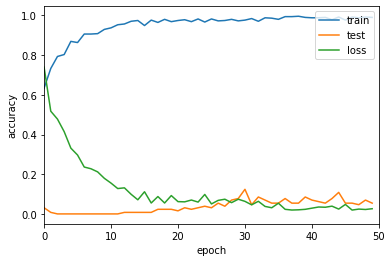

In [403]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'loss'], loc='upper right')
plt.xlim(0, 50)
plt.show()

# 2 Hidden Layers

In [474]:
def create_model(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(Dense(hidden_layers*1.5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense((hidden_layers), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [475]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, optimizer='Adamax',init='uniform')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [476]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Train on 513 samples
Epoch 1/50
513/513 [==============================] - 2s 3ms/sample - loss: 0.8869 - accuracy: 0.5906
Epoch 2/50
513/513 [==============================] - 0s 344us/sample - loss: 0.6353 - accuracy: 0.6940
Epoch 3/50
513/513 [==============================] - 0s 344us/sample - loss: 0.5967 - accuracy: 0.7407
Epoch 4/50
513/513 [==============================] - 0s 347us/sample - loss: 0.5564 - accuracy: 0.7212
Epoch 5/50
513/513 [==============================] - 0s 346us/sample - loss: 0.5398 - accuracy: 0.7524
Epoch 6/50
513/513 [==============================] - 0s 362us/sample - loss: 0.4925 - accuracy: 0.7739
Epoch 7/50
513/513 [==============================] - 0s 349us/sample - loss: 0.4582 - accuracy: 0.7895
Epoch 8/50
513/513 [==============================] - 0s 346us/sample - loss: 0.4838 - accuracy: 0.7680
Epoch 9/50
513/513 [==============================] - 0s 357us/sample - loss: 0.4234 - accuracy: 0.8109
Epoch 10/50
513/513 [========================

In [477]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.96      0.74        67
           2       0.88      0.34      0.49        62

    accuracy                           0.66       129
   macro avg       0.74      0.65      0.62       129
weighted avg       0.74      0.66      0.62       129



In [466]:
print(confusion_matrix(y_test, y_pred))

[[48 19]
 [26 36]]


In [402]:
model.model.save('models/hidden_2.h5')

# 1 Hidden Layer

In [447]:
def create_model(optimizer='rmsprop',init='glorot_uniform', dropout=0.3):
    model = Sequential()
    # adding layers and adding droplayers to avoid overfitting
    hidden_layers = len(selected_genes)
    model.add(Dense(hidden_layers, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [452]:
# parameters selected from previous gridsearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=16, optimizer='Adamax',init='uniform')
# kfold = KFold(n_splits=3, shuffle=True)
# results = cross_val_score(model, X_train, y_train, cv=kfold)
# print("Baseline Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [453]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Train on 513 samples
Epoch 1/50
513/513 [==============================] - 1s 2ms/sample - loss: 0.7165 - accuracy: 0.6238
Epoch 2/50
513/513 [==============================] - 0s 300us/sample - loss: 0.5545 - accuracy: 0.7251
Epoch 3/50
513/513 [==============================] - 0s 317us/sample - loss: 0.4661 - accuracy: 0.7758
Epoch 4/50
513/513 [==============================] - 0s 297us/sample - loss: 0.4446 - accuracy: 0.7992
Epoch 5/50
513/513 [==============================] - 0s 294us/sample - loss: 0.4202 - accuracy: 0.8187
Epoch 6/50
513/513 [==============================] - 0s 293us/sample - loss: 0.4035 - accuracy: 0.8148
Epoch 7/50
513/513 [==============================] - 0s 292us/sample - loss: 0.3858 - accuracy: 0.8324
Epoch 8/50
513/513 [==============================] - 0s 312us/sample - loss: 0.3890 - accuracy: 0.8324
Epoch 9/50
513/513 [==============================] - 0s 302us/sample - loss: 0.3431 - accuracy: 0.8558
Epoch 10/50
513/513 [========================

In [454]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.84      0.75        67
           2       0.76      0.56      0.65        62

    accuracy                           0.71       129
   macro avg       0.72      0.70      0.70       129
weighted avg       0.72      0.71      0.70       129



In [455]:
print(confusion_matrix(y_test, y_pred))

[[56 11]
 [27 35]]


In [27]:
model.model.save('models/hidden_1.h5')